# Simple Static Model of Ownership and Asset Creation

In this little workbook, I'm hoping to elucidate a model of the asset creation decision where the existence of a market for the asset in the future is unknown. The idea is really to get a model with multiplicity, so that the existence of a market becomes something of a self-fulfilling prophesy. 

The structure:

1) A population of $n$ agents is born into the world. Agents know nothing about their abilities in production, but are endowed with the ability to create a unit of an asset. The costs of creating a unit of an asset are drawn from a distribution: $f(x)$, with $F(x)$ representing the cumulative distribution.  

2) Next, agents are endowed with productive ability. Agents who have a unit of an asset can try to sell it. Agents who don't have a unit can try and buy it. 

Working backwards:

Suppose in the first period an amount of agents $c$ have created a unit of the asset. Costs of creating an asset are given by $g(c)+\varepsilon_i$. 


#  Solution

To start, we are going to simulate a market and see how it works. 

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

Some scalar values and random draws for costs and productivity parameters:

In [3]:
P = 1
G = .3
N = 100000

pi = np.random.normal(1, 1, N)
ei = np.random.normal(.2, 1, N)

## Conditions for an agent who doesn't own to buy

When does an agent want to be an owner? Well, when:

$$
\textrm{Max}\left[\pi_i-g(c)-e_i,\pi_i - p \right] >0
$$

And when would such an agent prefer buying? Well, when:

$$
\pi_i - g(c) - e_i \leq \pi_i - p
$$

Or

$$
e_i \geq p - g(c)
$$

Let's get a plot going of these agents and their types:

In [8]:
rets = pd.DataFrame(np.array((pi,ei,pi-G-ei, pi-P)))

In [10]:
rets = rets.T

In [12]:
rets.columns = ['pi', 'ei', 'squat', 'buy']

In [26]:
rets['owner'] = pd.DataFrame.max(rets[['squat', 'buy']], axis=1) > 0

In [30]:
rets['buyer'] = rets['owner'] & (rets['ei'] > (P - G))

In [32]:
owners = rets.loc[rets['owner']]

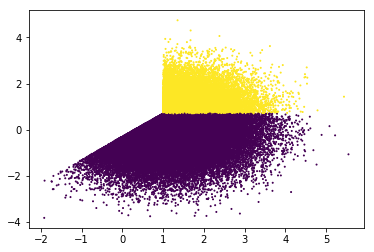

In [39]:
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
ax1.scatter(owners['pi'], owners['ei'], c = owners['buyer'], s=1)
plt.show()

In [42]:
def slidinggraph(P, G):
    rets = pd.DataFrame(np.array((pi,ei,pi-G-ei, pi-P)))
    rets = rets.T
    rets.columns = ['pi', 'ei', 'squat' 'buy']
    rets['owner'] = pd.DataFrame.max(rets[['squat', 'buy']], axis=1) > 0
    rets['buyer'] = rets['owner'] & (rets['ei'] > (P - G))
    owners = rets.loc[rets['owner']]
      
    fig1 = plt.figure(1)
    ax1 = fig1.add_subplot(111)
    ax1.scatter(owners['pi'], owners['ei'], c = owners['buyer'], s=1)
    plt.show()   

In [43]:
slidinggraph(1, .4)

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements